In [1]:
# !pip install -U scikit-learn
# !pip install matplotlib
# !pip install numpy
# !pip3 install glob3
# !pip install nltk
# !pip install pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from util import CorpusLoader, TextNormalizer, KMeansClusterer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [3]:
corpus = CorpusLoader('../datasets/Introductions_dataset/*.txt')
df = corpus.df
df.head()

,instances
0,{\rtf1\ansi\ansicpg1252\cocoartf2576\n\cocoate...
1,The case of one explanatory variable is called...
2,This term is distinct from multivariate linear...
3,Such models are called linear models .
4,"Most commonly, the conditional mean of the res..."


In [4]:
# model = Pipeline([
#         ('normalize',TextNormalizer()),
#         ('vectorizer', CountVectorizer(min_df=5,max_df=0.4,max_features=1500)),
#         ('clusterer', KMeansCluster()),
# ])

In [5]:
normalizer = TextNormalizer()
norm = normalizer.transform(corpus.df.instances)
df.instances = norm
vec = CountVectorizer(min_df=2,max_df=0.8,max_features=100)
X = vec.fit_transform(norm)

from sklearn.metrics import silhouette_score
best_labels = None
best_k = 0
max_score = -2
for i in range(2,7):
    kmc = KMeansClusterer(k=i)
    labels = kmc.fit_transform(X.toarray())
    model = kmc.model
    score = silhouette_score(X.toarray() ,labels, metric="euclidean")
    print('K:',i,'-> Avg score:',score)
    
    if score > max_score:
        max_score = score
        best_labels = labels
        best_k = i

K: 2 -> Avg score: 0.47496051767676467
K: 3 -> Avg score: 0.31766801423951047
K: 4 -> Avg score: 0.07768751747694301
K: 5 -> Avg score: 0.157126281704892
K: 6 -> Avg score: 0.1899406999221355


0 = helvetica statistic linear regression linear appro
1 = case one explanatory variable called simple linear
2 = term distinct multivariate linear regression multi
3 = model called linear model
4 = commonly conditional mean response given value exp
5 = like form regression analysis linear regression fo
6 = model depend linearly unknown parameter easier fit
7 = helvetica linear regression perhaps one well known
8 = post learn linear regression belongs statistic mac
9 = gentle introduction technique give enough backgrou
10 = dominant sequence transduction model based complex
11 = best performing model also connect encoder decoder
12 = propose new simple network architecture transforme
13 = experiment two machine translation task show model
14 = model achieves bleu wmt translation task improving
...


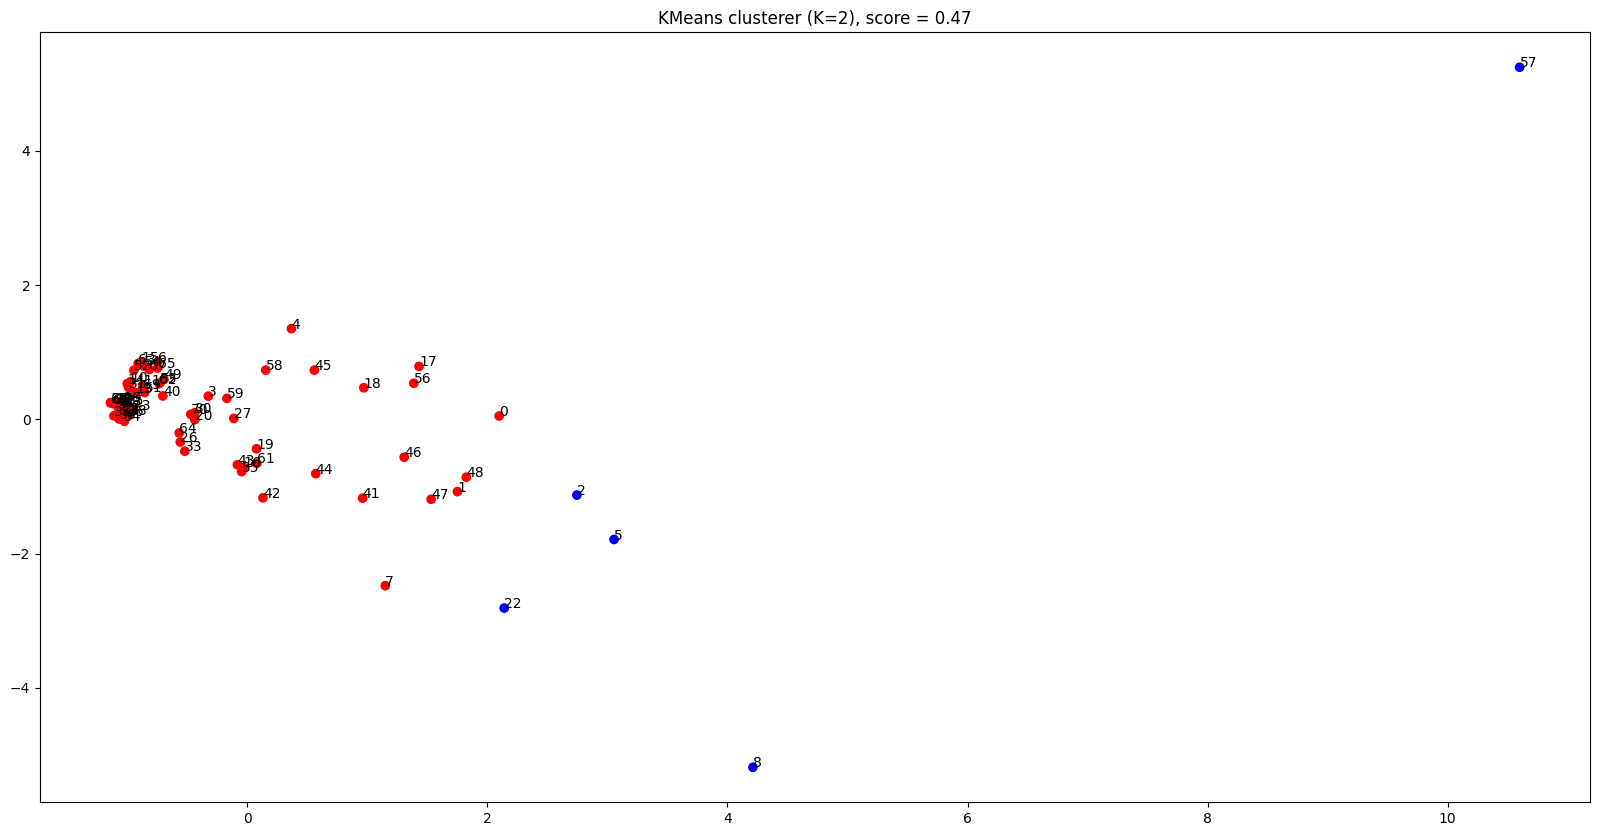

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=71)
scatter_plot_points = pca.fit_transform(X.toarray())

colors = ["r", "b", "c", "y", "m", "k", "g"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots(figsize=(20,10))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in best_labels])

for i, txt in enumerate(corpus.df.instances):
    ax.annotate(i, (x_axis[i], y_axis[i]))
    
index = 0
for ins in normalizer.normalize(corpus.df.instances):
    print('{} = {}'.format(index,ins[:50]))
    index+=1
    if index == 15:
        print('...')
        break
plt.title('KMeans clusterer (K={}), score = {:.2f}'.format(best_k,max_score))
plt.show()

In [7]:
df['labels'] = labels

In [8]:
X = vec.fit_transform(df.instances)
y = df.labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         0

    accuracy                           0.93        15
   macro avg       0.50      0.50      0.50        15
weighted avg       0.93      0.93      0.93        15



/Users/nima/opt/anaconda3/envs/project/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nima/opt/anaconda3/envs/project/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nima/opt/anaconda3/envs/project/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(